In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import label_binarize

In [4]:
final_train = pd.read_csv("/content/drive/MyDrive/SocialMedia_Datathon_2025/train_labelEncoded.csv")
final_test = pd.read_csv("/content/drive/MyDrive/SocialMedia_Datathon_2025/test_labelEncoded.csv")
final_val = pd.read_csv("/content/drive/MyDrive/SocialMedia_Datathon_2025/val_labelEncoded.csv")

In [29]:
# Reorder columns to match train_df order
test_df = final_test[final_train.columns]
final_val = final_val[final_train.columns]
X_train = final_train.drop('Platform', axis=1)
y_train = final_train['Platform']

X_test = test_df.drop('Platform', axis=1)
y_test = test_df['Platform']

X_val = final_val.drop('Platform', axis=1)
y_val = final_val['Platform']

SMOTE FOR IMBALANCED DATA

In [30]:
# SMOTE FOR TRAINING DATA
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

USING GRIDSEARCH CV FOR HYPERPARAMETER TUNING

1. DECISION TREE

In [31]:
# --- Decision Tree ---
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [3, 15, 20, 30, None],
    'min_samples_split': [5, 10, 20, 30],
    'min_samples_leaf': [2, 4, 8, 16]
}
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=0)
grid_search_dt.fit(X_train_resampled, y_train_resampled)
best_dt_classifier = grid_search_dt.best_estimator_
best_dt_classifier.fit(X_train_resampled, y_train_resampled)
y_test_pred_dt = best_dt_classifier.predict(X_test)
y_val_pred_dt = best_dt_classifier.predict(X_val)
y_test_proba_dt = best_dt_classifier.predict_proba(X_test)

2. RANDOM FOREST CLASSIFIER

In [32]:
# --- Random Forest ---
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators':[50, 70, 100,],
    'max_depth': [3, 10, 20,30, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=10, n_jobs=-1, verbose=0)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_classifier.fit(X_train_resampled, y_train_resampled)
y_test_pred_rf = best_rf_classifier.predict(X_test)
y_val_pred_rf = best_rf_classifier.predict(X_val)
y_test_proba_rf = best_rf_classifier.predict_proba(X_test)

3. NEURAL NETWORK Multi Layer Perceptron

In [33]:
# --- MLP ---
mlp_classifier = MLPClassifier(random_state=42, max_iter=100)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,50), (150, 100,50), (200, 150,100,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
grid_search_mlp = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid_mlp, cv=3, n_jobs=-1, verbose=0)
grid_search_mlp.fit(X_train_resampled, y_train_resampled)
best_mlp_classifier = grid_search_mlp.best_estimator_
best_mlp_classifier.fit(X_train_resampled, y_train_resampled)
y_test_pred_mlp = best_mlp_classifier.predict(X_test)
y_val_pred_mlp = best_mlp_classifier.predict(X_val)
y_test_proba_mlp = best_mlp_classifier.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
print("MLP Best Parameters:", grid_search_mlp.best_params_)

MLP Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant'}


In [21]:
accuracy_score(y_test, y_test_pred_mlp)

0.42574257425742573

4. SUPPORT VECTOR CLASSIFIER

In [34]:
# --- SVC (Support Vector Classifier) ---
from sklearn.svm import SVC
svc_classifier = SVC(random_state=42, probability=True)
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, cv=3, n_jobs=-1, verbose=0)
grid_search_svc.fit(X_train_resampled, y_train_resampled)
best_svc_classifier = grid_search_svc.best_estimator_
best_svc_classifier.fit(X_train_resampled, y_train_resampled)
y_test_pred_svc = best_svc_classifier.predict(X_test)

In [35]:
y_val_pred_svc = best_svc_classifier.predict(X_val)

In [36]:
y_test_proba_svc = best_svc_classifier.predict_proba(X_test)

In [37]:
# --- XGBoost ---
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=0)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb_classifier = grid_search_xgb.best_estimator_
best_xgb_classifier.fit(X_train_resampled, y_train_resampled)
y_test_pred_xgb = best_xgb_classifier.predict(X_test)
y_val_pred_xgb = best_xgb_classifier.predict(X_val)
y_test_proba_xgb = best_xgb_classifier.predict_proba(X_test)

COMPARISON OF DIFFERENT MODELS

In [38]:
from sklearn.metrics import r2_score
def calculate_r2_classification(y_true, y_proba):
    y_bin = label_binarize(y_true, classes=np.unique(y_true))
    r2_values = []
    for i in range(y_bin.shape[1]):
        r2 = r2_score(y_bin[:, i], y_proba[:, i])
        r2_values.append(r2)
    return np.mean(r2_values) #average of all classes

In [28]:
calculate_r2_classification(y_test, y_test_proba_mlp)

np.float64(-0.07803432812686158)

In [40]:
# --- Evaluation ---
results = []
results.append(['Random Forest', accuracy_score(y_test, y_test_pred_rf), accuracy_score(y_val, y_val_pred_rf), f1_score(y_test, y_test_pred_rf, average='weighted'), precision_score(y_test, y_test_pred_rf, average='weighted'), recall_score(y_test, y_test_pred_rf, average='weighted'), calculate_r2_classification(y_test, y_test_proba_rf)])
results.append(['MLP', accuracy_score(y_test, y_test_pred_mlp), accuracy_score(y_val, y_val_pred_mlp), f1_score(y_test, y_test_pred_mlp, average='weighted'), precision_score(y_test, y_test_pred_mlp, average='weighted'), recall_score(y_test, y_test_pred_mlp, average='weighted'), calculate_r2_classification(y_test, y_test_proba_mlp)])
results.append(['XGBoost', accuracy_score(y_test, y_test_pred_xgb), accuracy_score(y_val, y_val_pred_xgb), f1_score(y_test, y_test_pred_xgb, average='weighted'), precision_score(y_test, y_test_pred_xgb, average='weighted'), recall_score(y_test, y_test_pred_xgb, average='weighted'), calculate_r2_classification(y_test, y_test_proba_xgb)])
results.append(['Decision Tree', accuracy_score(y_test, y_test_pred_dt), accuracy_score(y_val, y_val_pred_dt), f1_score(y_test, y_test_pred_dt, average='weighted'), precision_score(y_test, y_test_pred_dt, average='weighted'), recall_score(y_test, y_test_pred_dt, average='weighted'), calculate_r2_classification(y_test, y_test_proba_dt)])
results.append(['SVC', accuracy_score(y_test, y_test_pred_svc), accuracy_score(y_val, y_val_pred_svc), f1_score(y_test, y_test_pred_svc, average='weighted'), precision_score(y_test, y_test_pred_svc, average='weighted'), recall_score(y_test, y_test_pred_svc, average='weighted'), calculate_r2_classification(y_test, y_test_proba_svc)])

results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Validation Accuracy','F1 Score', 'Precision', 'Recall','R2'])
print("Model Performance:")
print(results_df)

Model Performance:
           Model  Test Accuracy  Validation Accuracy  F1 Score  Precision  \
0  Random Forest       0.554455             0.706294  0.554005   0.582926   
1            MLP       0.475248             0.762238  0.471526   0.493989   
2        XGBoost       0.455446             0.741259  0.452725   0.459241   
3  Decision Tree       0.445545             0.615385  0.425696   0.453448   
4            SVC       0.544554             0.741259  0.529838   0.540968   

     Recall        R2  
0  0.554455  0.186958  
1  0.475248 -0.150079  
2  0.455446 -0.042480  
3  0.445545 -0.352496  
4  0.544554  0.035170  


BEST HYPERPARAMETERS FOR EACH MODEL

In [41]:
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("MLP Best Parameters:", grid_search_mlp.best_params_)
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
print("Decision Tree Best Parameters:", grid_search_dt.best_params_)
print("SVC Best Parameters:", grid_search_svc.best_params_)

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MLP Best Parameters: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 150, 100, 50), 'learning_rate': 'constant'}
XGBoost Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Decision Tree Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
SVC Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


ROC CURVES FOR EACH MODEL AND CONFUSION MATRIX

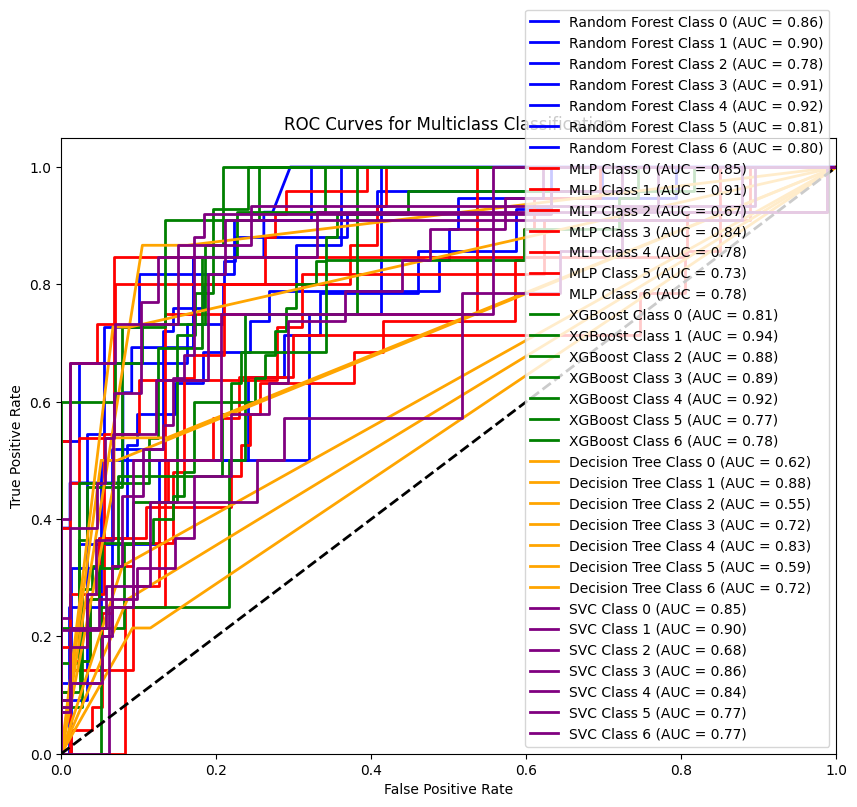

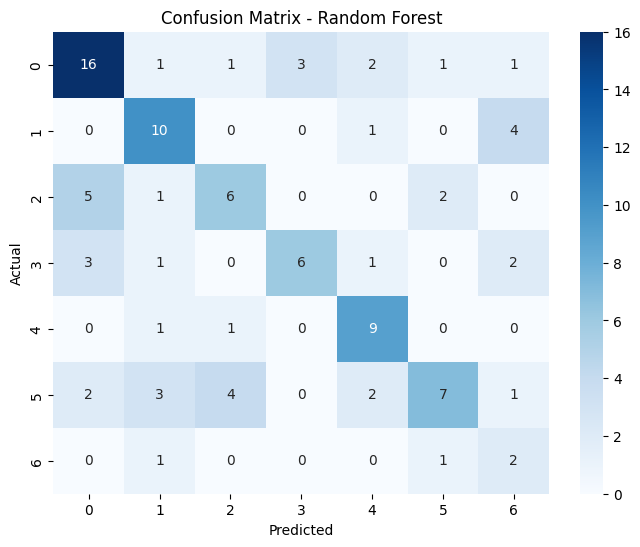

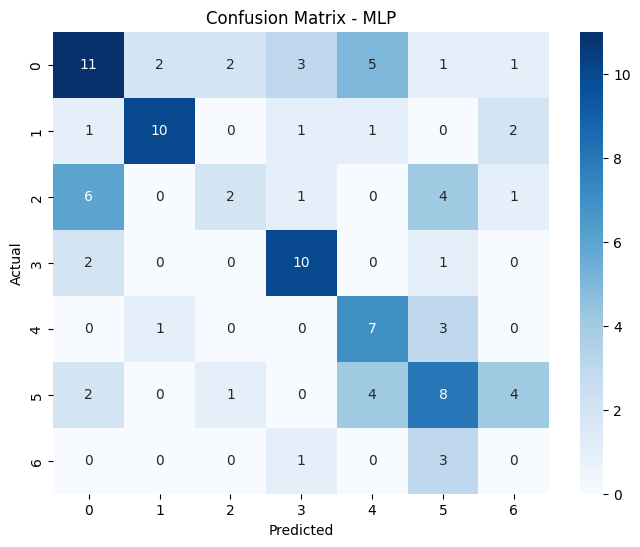

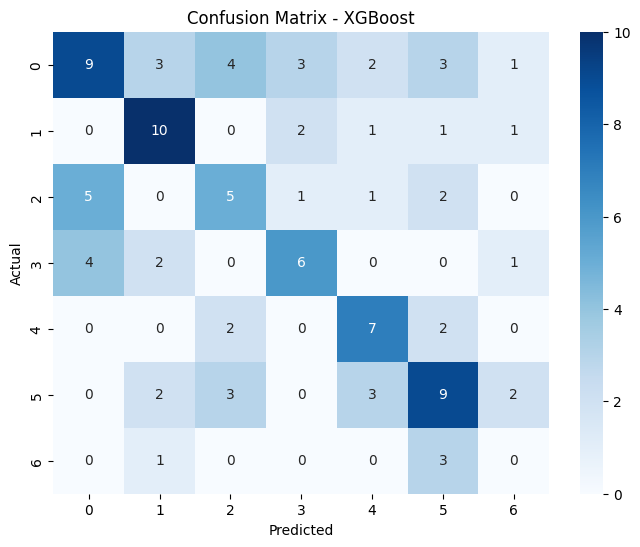

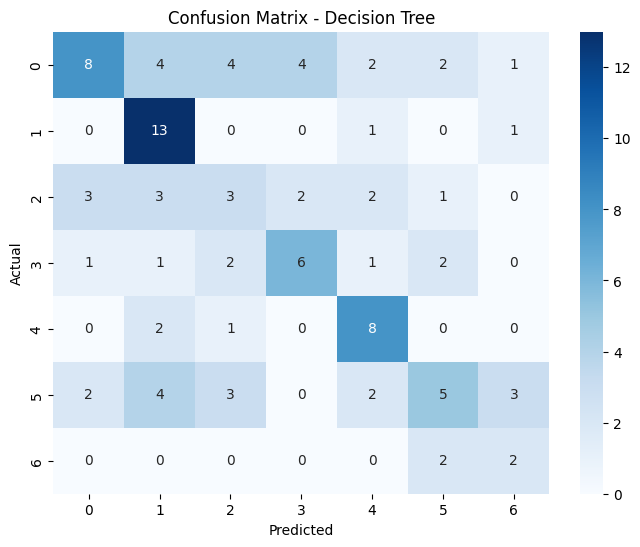

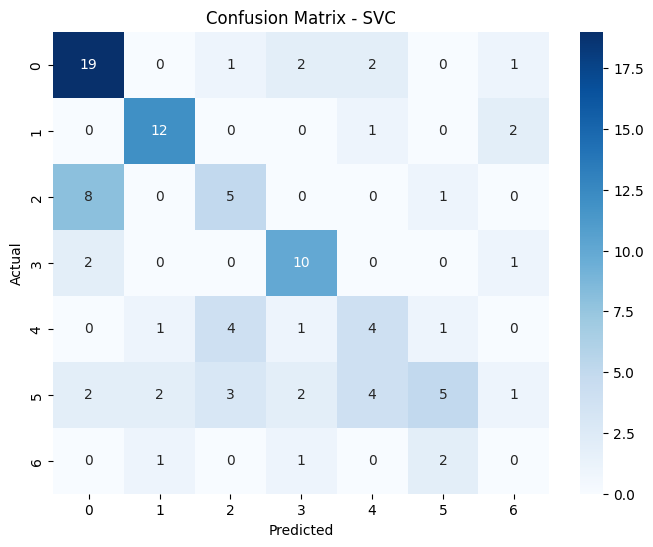

In [42]:
# --- ROC Curves ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

for model_name, y_proba, color in zip(['Random Forest', 'MLP', 'XGBoost', 'Decision Tree', 'SVC'],
                                       [y_test_proba_rf, y_test_proba_mlp, y_test_proba_xgb, y_test_proba_dt, y_test_proba_svc],
                                       colors):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i, color in zip(range(n_classes), cycle([color])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{model_name} Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# --- Confusion Matrices ---
models = {
    'Random Forest': (y_test_pred_rf),
    'MLP': (y_test_pred_mlp),
    'XGBoost': (y_test_pred_xgb),
    'Decision Tree': (y_test_pred_dt),
    'SVC': (y_test_pred_svc)
}

for name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

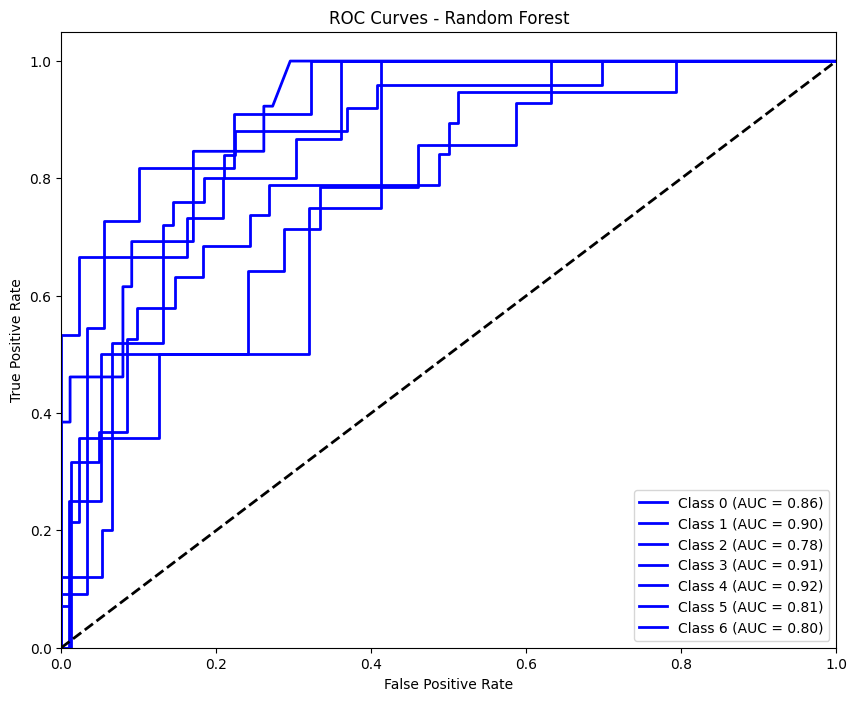

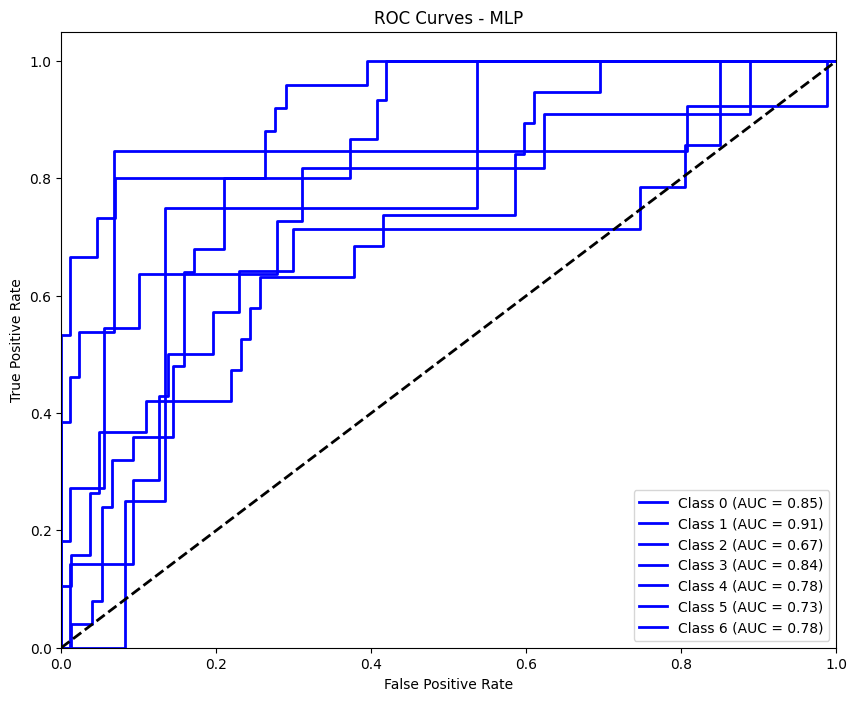

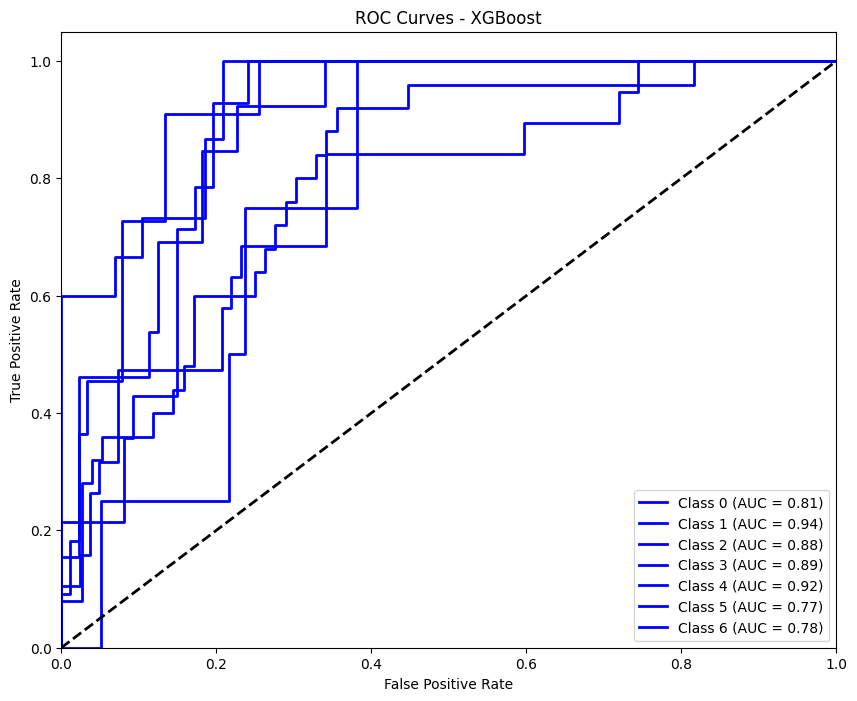

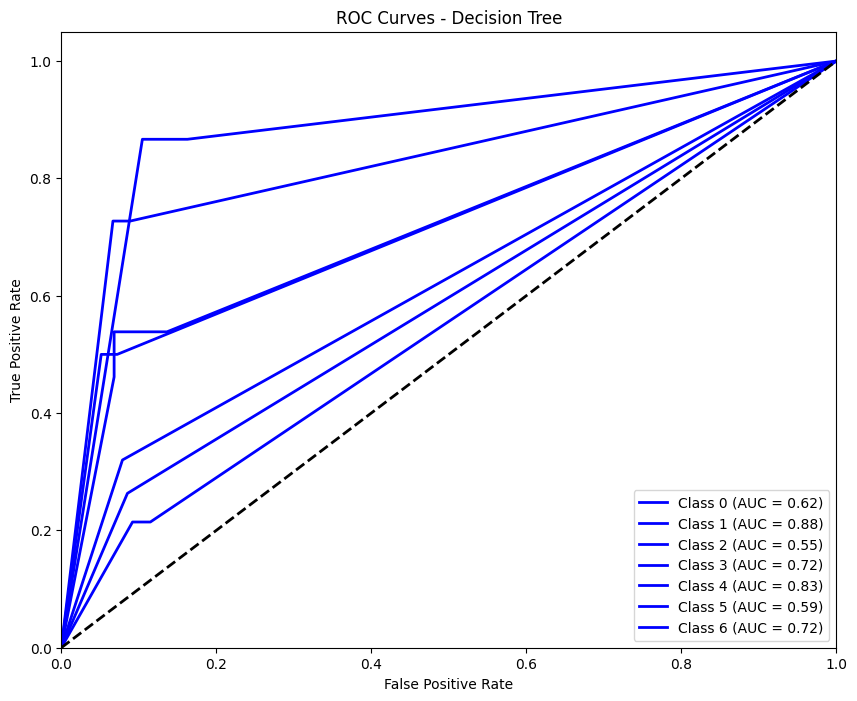

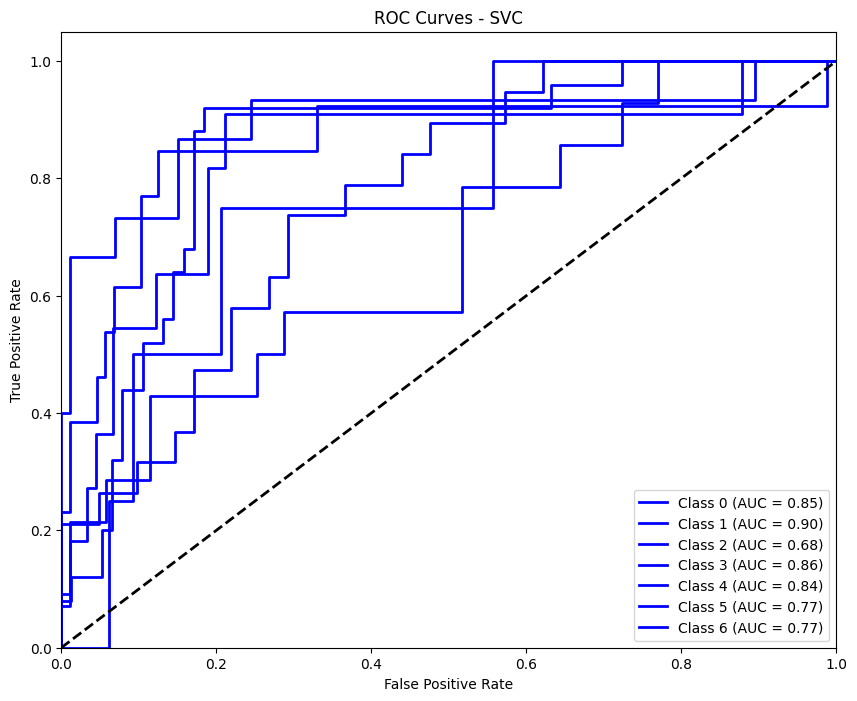

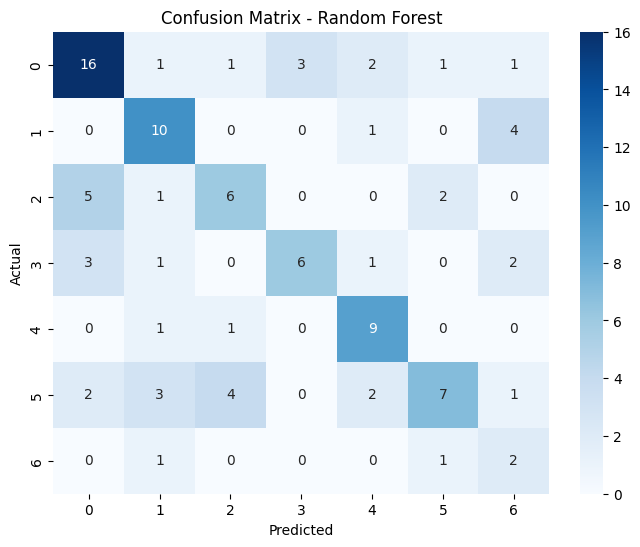

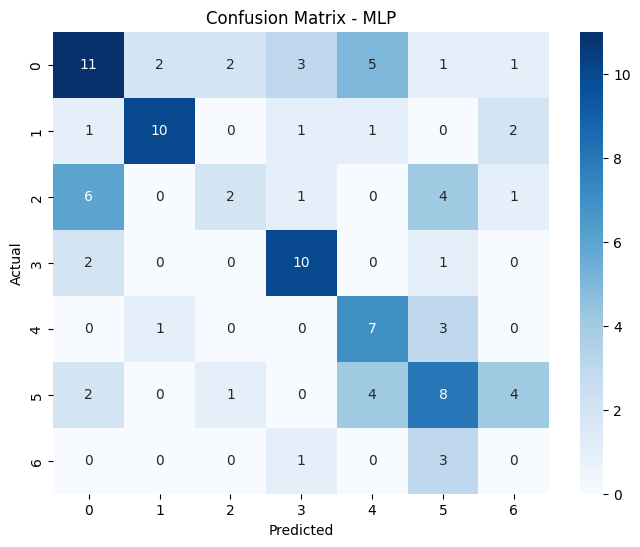

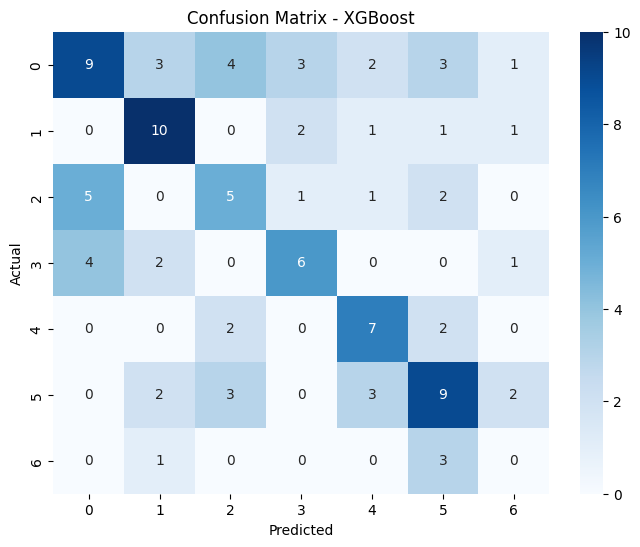

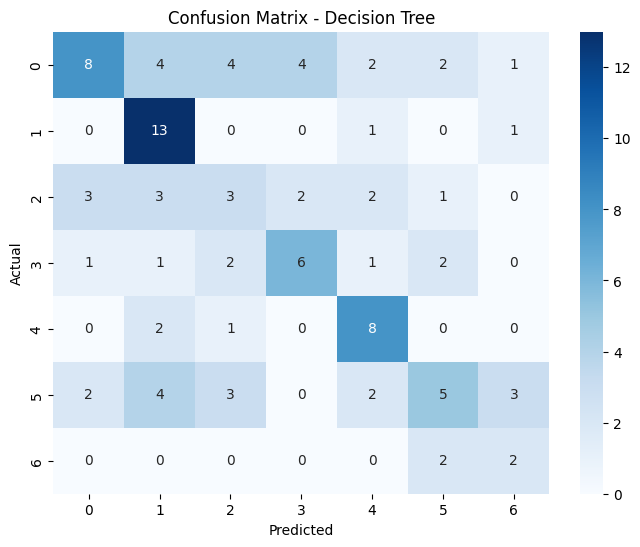

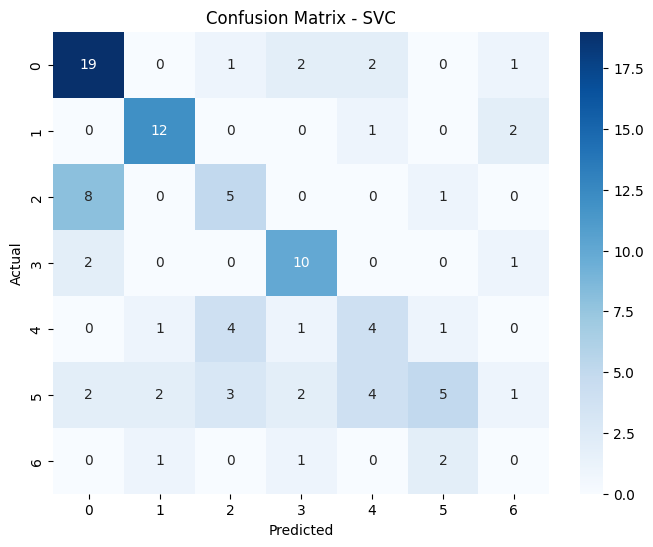

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle

# --- ROC Curves for Different Models ---
def plot_roc_curves_separate(y_test, y_test_proba_dict):
    """
    Plots separate ROC curves for each model in a multiclass classification.

    Args:
        y_test (array-like): True labels.
        y_test_proba_dict (dict): Dictionary of model names and their predicted probabilities.
    """

    y_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_bin.shape[1]

    for model_name, y_proba in y_test_proba_dict.items():
        plt.figure(figsize=(10, 8))
        colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        for i, color in zip(range(n_classes), cycle([colors.__next__()])): #fix color issue
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

# --- Confusion Matrices ---
def plot_confusion_matrices(y_test, y_test_pred_dict):
    """
    Plots confusion matrices for each model.

    Args:
        y_test (array-like): True labels.
        y_test_pred_dict (dict): Dictionary of model names and their predicted labels.
    """

    for name, y_pred in y_test_pred_dict.items():
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

# Example Usage (replace with your actual data)
# Assuming y_test, y_test_proba_rf, y_test_proba_mlp, etc., are defined
y_test_proba_dict = {
    'Random Forest': y_test_proba_rf,
    'MLP': y_test_proba_mlp,
    'XGBoost': y_test_proba_xgb,
    'Decision Tree': y_test_proba_dt,
    'SVC': y_test_proba_svc
}

y_test_pred_dict = {
    'Random Forest': y_test_pred_rf,
    'MLP': y_test_pred_mlp,
    'XGBoost': y_test_pred_xgb,
    'Decision Tree': y_test_pred_dt,
    'SVC': y_test_pred_svc
}

plot_roc_curves_separate(y_test, y_test_proba_dict)
plot_confusion_matrices(y_test, y_test_pred_dict)

SAVING THE MODELS

In [ ]:
import joblib
joblib.dump(best_xgb_classifier, "xgboost_model.joblib")

['xgboost_model.joblib']

In [44]:

joblib.dump(best_dt_classifier, "dt_model.joblib")

['dt_model.joblib']

In [48]:

joblib.dump(best_rf_classifier, "rf_model.joblib")

['rf_model.joblib']

In [50]:

joblib.dump(best_mlp_classifier, "mlp_model.joblib")

['mlp_model.joblib']

In [49]:
import joblib
joblib.dump(best_svc_classifier, "svc_model.joblib")

['svc_model.joblib']